In [1]:
# run all these code in jupyter notenook
# when the set is empty, I assigned the majority labels of 'target' to new instance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
'''
divide the dataset into train_set and test_set
csv_path: the path of .csv file
ratio: ratio of train data and whole dataset

return whole_set, train_set,test_set
'''
def divide_set(csv_path,ratio):
    
    dframe = pd.read_csv(path)

    df = shuffle(dframe)
    
    q = len(df)*ratio 

    train_set = df.iloc[:int(q)]
    train_set = train_set.reset_index(drop=True)
    
    test_set = df.iloc[int(q):]
    test_set = test_set.reset_index(drop=True)

    return df, train_set, test_set
#calculate the entropy
def entropy(numerator,denominator):
    p = numerator/denominator
    I = -p*np.log2(p)
    return I
# select the unique values in dataset
def unique_values(train_set,attr):
    values = np.unique(train_set[attr])
    return values
#calculate the average entropy of branches
#attr: the parent of branches
def cal_info(train_set,attr): 
    
    I_avg = 0
    
    attr_values = unique_values(train_set,attr)
    for value in attr_values:
        info = 0
        attr_set = train_set[train_set[attr] == value]
        # the weigh of the number of att_set[where(att==value)] and the number of att_set
        w = len(attr_set)/(len(train_set))
        
        for label in [0,1]:
            # the length of (attr ==value)&&('target'==label)
            num = len(train_set[(train_set[attr] == value) & (train_set['target'] == label)])
            # add a small num 10**(-20) in case of the denominator==0
            p = num/(len(attr_set)+10**(-20))
            info = info + (-(p)*np.log2(p+10**(-20)))
            
        I_avg = I_avg + w*info

    return I_avg
# select the majority label of original dataset
def majority_label(train_set):
    value_num = train_set.loc[:,'target'].value_counts() 
    most = value_num.idxmax()
    return most
# choose node at this moment
# most:the majority label of whole dataset
# uni_data: the unique values in this node attribute
# return decision_tree
def choose_node(train_set,most):
    
    I_ori = 0
    for label in [0,1]:
        I = entropy(len(train_set[train_set['target'] == label]),len(train_set))
        I_ori = I_ori + I
        
    I_set = {}
    
    for attr in list(train_set)[:-1]:

        info_attr = cal_info(train_set,attr)
        I_set[attr] = I_ori - info_attr
        
    # sort the information gain     
    I_set = sorted(I_set.items(), key=lambda x:x[1])
  
    #select the biggest gain
    node_name = I_set[-1][0]

    decision_tree = {}
    decision_tree[node_name] = {}
    
    # create a list with values in [0,1,2] but not in current attr_set
    left_value = []
    standard_value = np.array([0,1,2])

    node_value = unique_values(train_set,node_name)
    
    for i in standard_value:
        if i not in node_value and i not in left_value:
            left_value.append(i)
            
    #If this instance is not suitable for this decision tree        
    #Let left_value[0] be a leaf node labeled with the majority class in train_set        
    if left_value !=[]:
        decision_tree[node_name][left_value[0]] = most
        
    for value in node_value:
        # drop the column of current node from the current dataset
        new_set = train_set[train_set[node_name] == value]
        new_set = new_set.drop([node_name], axis=1)
        
        uni_data = unique_values(new_set,'target')

        # if there is only one value in this set, we define this attributs as new node
        # if not, recursion
        if len(uni_data) == 1: 
            decision_tree[node_name][value] = uni_data[0]
        else:
            decision_tree[node_name][value] = choose_node(new_set,most)          
        
    return decision_tree  
# predict the label of new instance
# new_ins: single instance in train_set or test_set
def label(new_ins, tree, most):
    
    for i in tree.keys():
        #find the value of the root node of new instance
        value = new_ins[i]
        # determine whether the node exsits or not
        # if exists, go to next node
        # else, assign the majority labels of whole data_set to this new instance
        if (tree[i][value] != None):
            tree = tree[i][value]
        else:
            tree = most
              
        predict_label = None
        # if this is not the end node, recursion will be used.
        if type(tree) is dict:
            predict_label = label(new_ins, tree, most)
    
        else:
            predict_label = tree
            break

    return predict_label
# calculate the number of correct prediction
def accuracy(test_set, decision_tree, most):
    right = 0
    acc = 0
    for j in range(len(test_set)):
           
        predict_label = label(test_set.iloc[j][:-1], decision_tree, most)
        # determine whether the real label is the same with prediction label
        if (predict_label == test_set.iloc[j][-1]):
            right = right + 1
            
    acc = acc + right/len(test_set) 
    
    return acc
def accuracy_plot(accuracy,t1_loc = 20,t2_loc = 18,set_name = 'Testing Data',save_name = 'tree(test).png'):
    avg_accuracy = np.mean(accuracy)
    std_accuracy = np.std(accuracy,ddof = 1 )

    plt.hist(accuracy,bins = 20)

    plt.ylabel('Accuracy Frequency on '+set_name, fontsize=12)
    plt.xlabel('Accuracy', fontsize=12)
    plt.text(0.86, t1_loc,'mean: '+str('%.4f' %avg_accuracy))
    plt.text(0.86, t2_loc, 'std:  '+str('%.4f' %std_accuracy))
    plt.xlim(0.80,1.05)
    plt.savefig('/home/jingran/Documents/'+save_name, dpi = 800)
    plt.show()

0.9080459770114943
0.8850574712643678
0.9540229885057471
0.9310344827586207
0.9425287356321839
0.9655172413793104
0.9310344827586207
0.8850574712643678
0.9655172413793104
0.9195402298850575
0.8735632183908046
0.9080459770114943
0.9425287356321839
0.9195402298850575
0.8620689655172413
0.896551724137931
0.9195402298850575
0.9540229885057471
0.9770114942528736
0.9425287356321839
0.9080459770114943
0.9195402298850575
0.9425287356321839
0.9540229885057471
0.9080459770114943
0.9770114942528736
0.9655172413793104
0.9540229885057471
0.9310344827586207
0.9080459770114943
0.9655172413793104
0.9540229885057471
0.9655172413793104
0.9425287356321839
0.9310344827586207
0.9540229885057471
0.9655172413793104
0.9310344827586207
0.9425287356321839
0.9425287356321839
0.9310344827586207
0.9655172413793104
0.9655172413793104
0.9310344827586207
0.9540229885057471
0.9080459770114943
0.9310344827586207
0.9425287356321839
0.9425287356321839
0.9195402298850575
0.9425287356321839
0.9310344827586207
0.98850574712

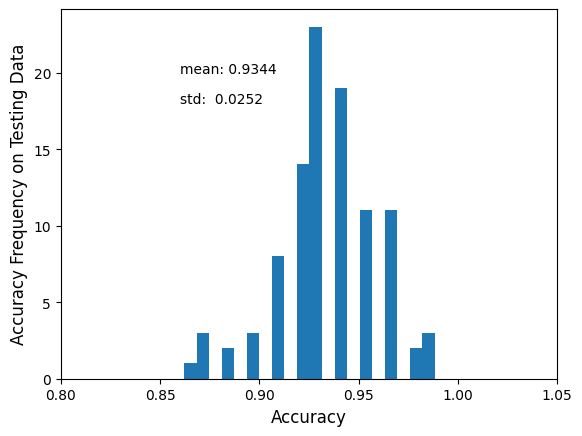

In [11]:
path = '/home/jingran/Downloads/house_votes_84.csv'
ratio = 0.8
times = int(100)
acc = np.zeros(times)

for i in range(times):

    df, train_set, test_set = divide_set(path,ratio)
    
    most = majority_label(train_set)
    
    decision_tree = choose_node(train_set,most)
           
    acc[i] = accuracy(test_set, decision_tree, most)
    print(acc[i])
print(acc)
accuracy_plot(acc)        


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


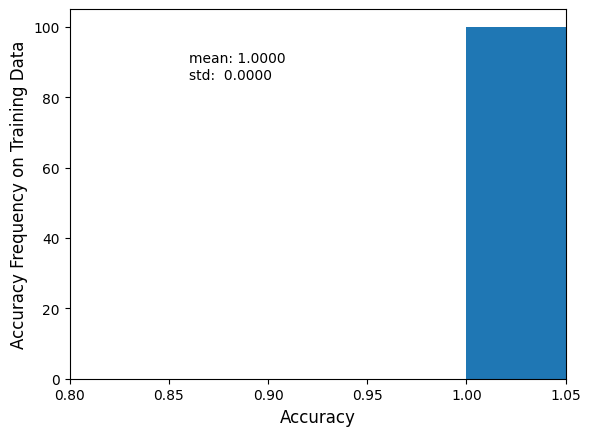

In [12]:
path = '/home/jingran/Downloads/house_votes_84.csv'
ratio = 0.8
times = int(100)
acc1 = np.zeros(times)

for i in range(times):

    df, train_set, test_set = divide_set(path,ratio)
    
    most = majority_label(train_set)
    
    decision_tree = choose_node(train_set,most)
           
    acc1[i] = accuracy(train_set, decision_tree, most)
    print(acc1[i])
print(acc1)
accuracy_plot(acc1,set_name = 'Training Data',t1_loc = 90,t2_loc =85,save_name = 'tree(train).png') 